# Declaration of Originality

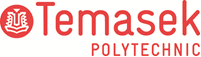

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  :  Justin Faris Bin Mohammad Zaki (2401311B)
* Tutorial Group                :  PC01
* Tutor						    :  Mr Ruchir SRIVASTAVA
* Submission Date               :  11 February 2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [89]:
## Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly

# 1. Business Understanding
Goal: Predict Flight prices and identify the most influential factors affecting Flight price variation.

# 2. Data Understanding

## 2.1 Load dataset

In [90]:
## Read *.csv file into pandas DataFrame
FILE_PATH = "airlines_flights_data.csv"
df = pd.read_csv(FILE_PATH)
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


## 2.2 Summary Statistics

### 2.2.1 - View Data types of each column

We can see that there are:
 - 8 string data types
 - 4 numerical data types

In [91]:
## Understand the type of variable for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


### 2.2.2 - Check for Missing/Null values

We can see that there are no mssing values in each column. Hence, there is no need to impute new values or delete rows with missing values in the dataset.

In [92]:
## Check for missing data
df.isna().sum()

index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

### 2.2.3 - Check the Summary Statistics for both Numerical and Categorical Columns

In [93]:
## Describe data distribution
df.describe(include="all")

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153.000000,300153,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,NaN,6,1561,6,6,3,6,6,2,NaN,NaN,NaN
top,NaN,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,NaN,127859,3235,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,150076.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,86646.852011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
25%,75038.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,150076.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000
75%,225114.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.170000,38.000000,42521.000000


## 2.3 Data Visualization

### 2.3.1 - Does different classes of different airlines affect price?

The Bar Graph below explores the relationship between Different Airlines and Average Flight Prices, split by "class" (Business vs Economy). It reveals that only "Air India" and "Vistara" offer Business Class and their prices are significantly higher than the other Airlines. This creates an Imbalance in the dataset, where the "class" feature is not Independent of the "airline" feature. The Business Class serves as Extreme Outliers, which could mislead the models during training if One-Hot Encoding is applied. Including "class" without adjustment could lead to Overfitting because the models may link High Prices with specific airlines rather than the class itself.

To address the issue, I decided that during Data Preparation, I should filter the dataset to only include Econonmy Class flights, ensuring that the model is more Balanced and Generalized. This decision will help reduce Noise and Variance, improving Interpretability and aligns with the Business Goals of providing Reliable Flight Price predictions across all airlines.

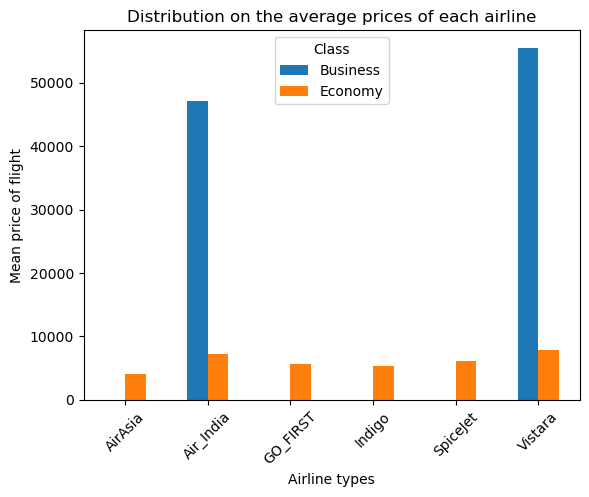

In [94]:
# Group by airline and class, then calculate mean price
mean_prices_class = df.groupby(["airline", "class"])["price"].mean().unstack()

mean_prices_class.plot(kind='bar', rot=45)
plt.title("Distribution on the average prices of each airline")
plt.xlabel("Airline types")
plt.ylabel("Mean price of flight")
plt.legend(title="Class")
plt.show()

### 2.3.2 - Does buying a ticket within a number of days before depature affect price?

The Line Chart below explores the relationship between the Average Economy Flight Prices and the Number of Days left Before Departure increases. Each line represents a Different Airline, showing how the Average Prices change over time. The Line Chart reveals a consistent pattern across all airlines which is Flight Prices tend to decrease as the Number of Daya left before Departure Increases. This tells me that there is a Negative Correlation between "days_left" and "price", suggesting that Last-Minute Bookings are generally More Expensive than Bookings made in advance.

Based on this insight, the "days_left feature clearly captures the dynamic pricing behaviour and should be retained as a Key Predictor in the Regression Model. From a Business Perspective, this supports the goal of helping consumers make informed Travel Decisions and allow Airlines to optimize pricing strategies.

In [95]:
# Only include Airlines in the Economy class
df_economy = df[df["class"] == "Economy"]

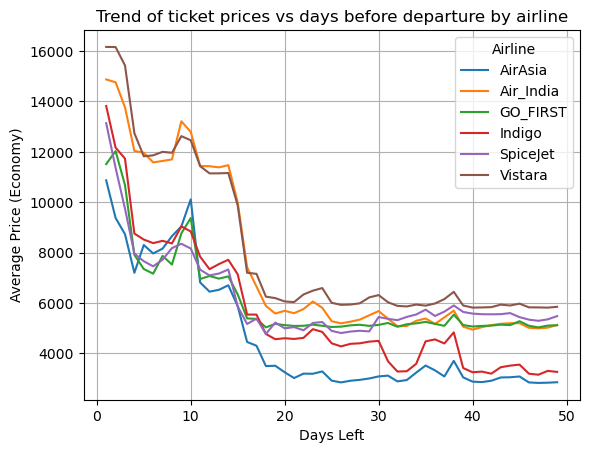

In [96]:
# Group by airline and days_left, then calculate mean price
mean_price_airline_days = df_economy.groupby(["airline", "days_left"])["price"].mean().reset_index()

for airline in mean_price_airline_days["airline"].unique():
    subset = mean_price_airline_days[mean_price_airline_days["airline"] == airline]
    plt.plot(subset["days_left"], subset["price"], label=airline)

plt.xlabel("Days Left")
plt.ylabel("Average Price (Economy)")
plt.title("Trend of ticket prices vs days before departure by airline")
plt.legend(title="Airline")
plt.grid(True)
plt.show()

### 2.3.3 - Does duration of flight affect price?

The Scatter plots below explores the Relationship between Flight Duration and Flight Prices across the 6 different Airlines in the Economy Class. Each Scatter plot reveals a general upward trend, indicating that Longer Flights are tend to have higher average prices. However, the steepness of the slope and Variance of the spread is different for each airline. For example, Air India and Vistara show a steeper upward trend which indicates that they have a more premium pricing for longer flights despite being in Economy Class, while AirAsia and SpiceJet has a flatter upward trend which indicates that their pricing is more consistent regarless of duration.

Based on this insight, I can confirm that Flight Duration is a meaningful predictor of Flight Price but they do vary shape and strength depending on the airline. This means that the "duration" feature should be retained as a key feature in modelling.

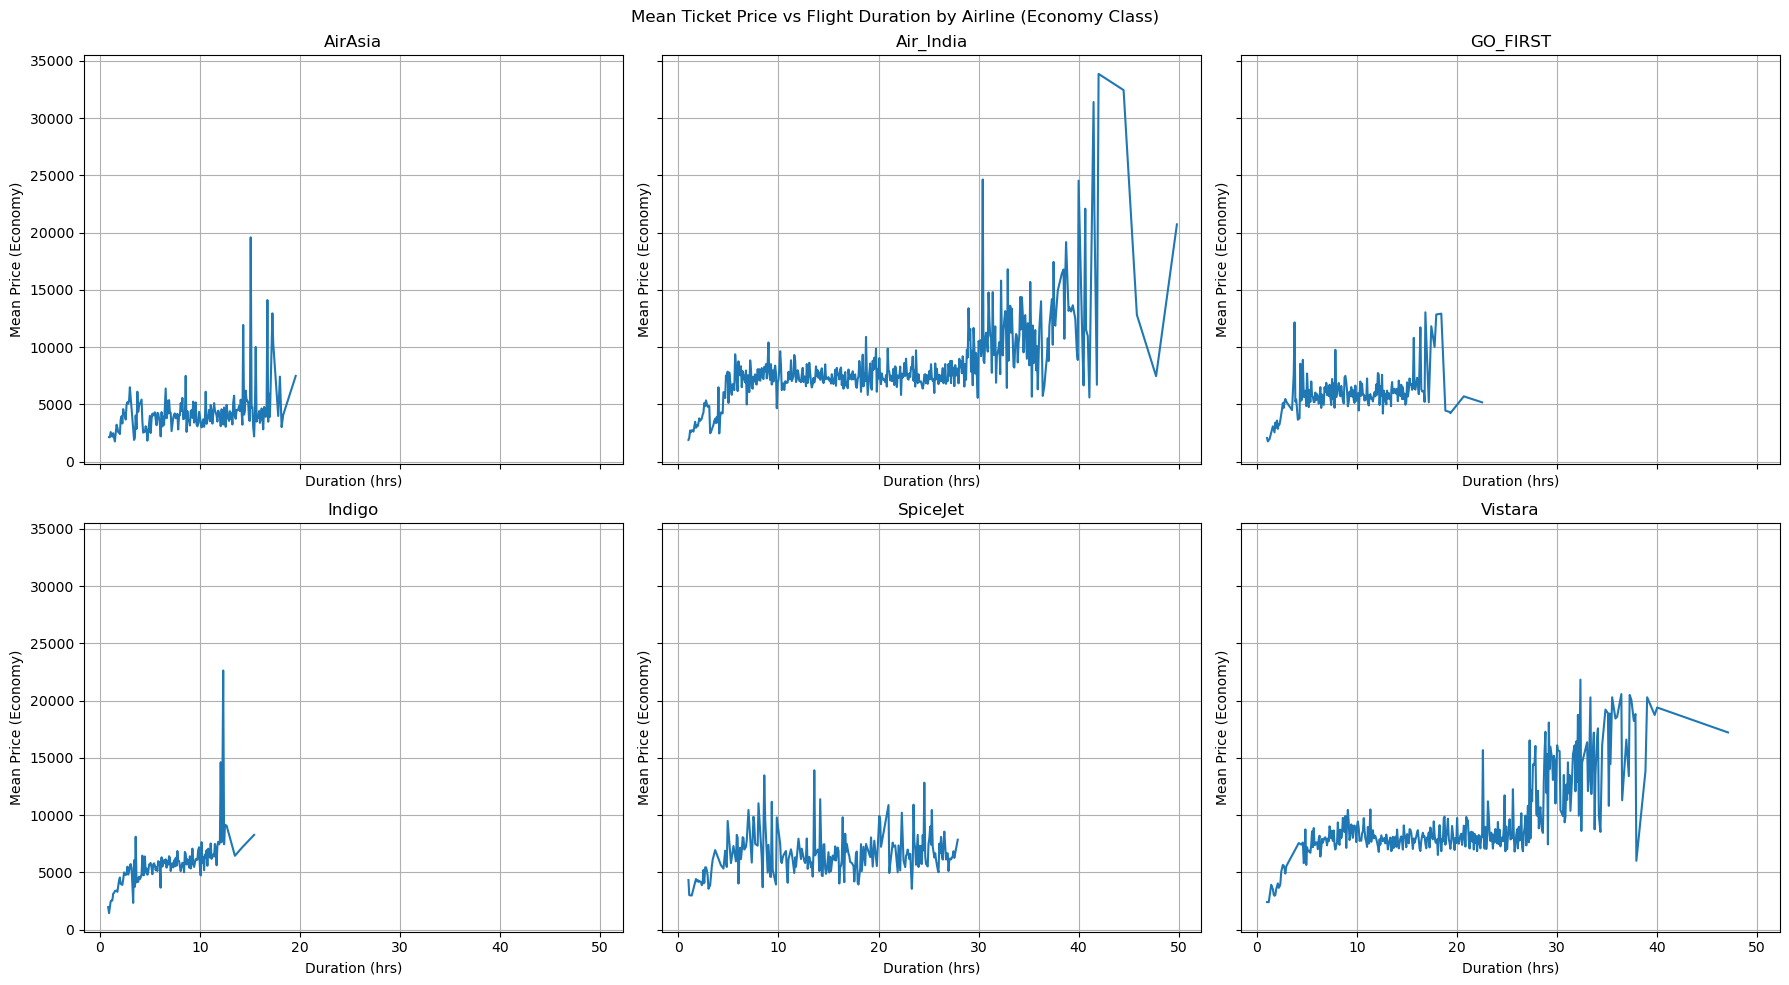

In [97]:
# Group by airline and duration, then calculate mean price
mean_price_airline_duration = df_economy.groupby(["airline", "duration"])["price"].mean().reset_index()

# Get unique airlines
airlines = mean_price_airline_duration["airline"].unique()

# Set up subplots (2 rows * 3 columns for 6 airlines)
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through airlines and plot each line graph in its own subplot
for i, airline in enumerate(airlines):
    subset = mean_price_airline_duration[mean_price_airline_duration["airline"] == airline]
    axes[i].plot(subset["duration"], subset["price"], label=airline)
    axes[i].set_title(airline)
    axes[i].set_xlabel("Duration (hrs)")
    axes[i].set_ylabel("Mean Price (Economy)")
    axes[i].grid(True)

# Adjust layout
plt.suptitle("Mean Ticket Price vs Flight Duration by Airline (Economy Class)")
plt.tight_layout()
plt.show()

### 2.3.4 - Does the Number of Stops from Start to End of flight affect price?

The Boxplot below explores the Distribution of Economy Class Flight Prices based on the number of stops: zero, one and two or more. Each Boxplot shows the median, Interquartile Range and Outliers for ticket prices within each stop category. The Boxplot reveals that flights with more stops tend to have a Higher Median Flight Price and Wider Flight Price Ranges. Futhermore, I can see that the "two_or_more" stops shows the Highest Variability and Median Flight Price, while Non-Stop Flights are generally Cheaper and More Consistent.

Based on this insight, the number of stops is a meaningful predictor but ts effect on Flight Pricing may be Non-Linear and influenced by other factors. For example, Increased cost for multi-stops flights may contribute to Longer routes and Added Duration. Thich means that "stops" should be carefully encoded to capture this pricing behaviour before modelling.

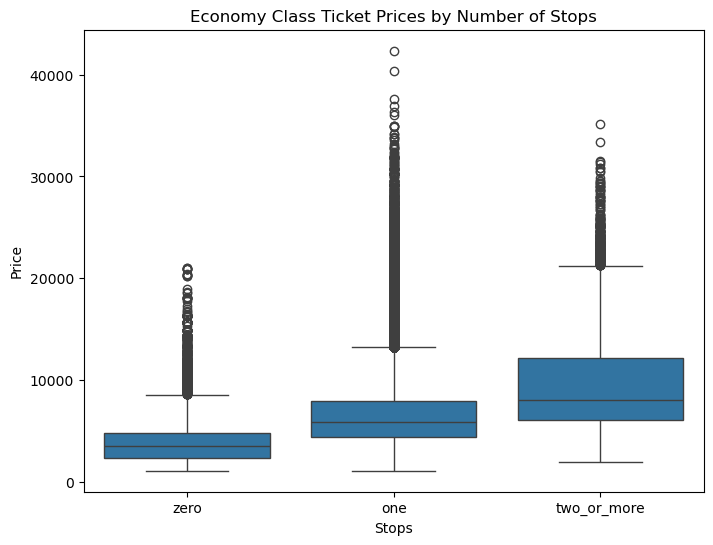

In [98]:
plt.figure(figsize=(8,6))
sns.boxplot(x="stops", y="price", data=df_economy)
plt.title("Economy Class Ticket Prices by Number of Stops")
plt.xlabel("Stops")
plt.ylabel("Price")
plt.show()

### 2.3.5 - Check the Distribution on the Number of Economy Flights of Each Airline

The Bar Chart below shows the Distribution of Economy Class Flights of each of the 6 different airlines. It reveals a clear imbalance in the number of flights acorss the 6 different airlines. Vistara, Air India and Indigo airlines dominate the Dataset with Vistara having the most number of flights. However, airlines like SpiceJet and AirAsia have significantly fewer records, indicating underrepresentation. 

This imbalance has serious implications for modelling. Using "airline" as a catagorical feature may introduce Bias, as the model could Overfit to dominate airlines and Struggle to Generalize for the airlines with Fewer samples. To mitigate this, using Train-Test split should be applied to ensure Fair Representation of all airlines during training and evaluation. Recognizing this imbalance helps identify skewed predictions and support the business goal of building a model that performs reliably accross all airlines..

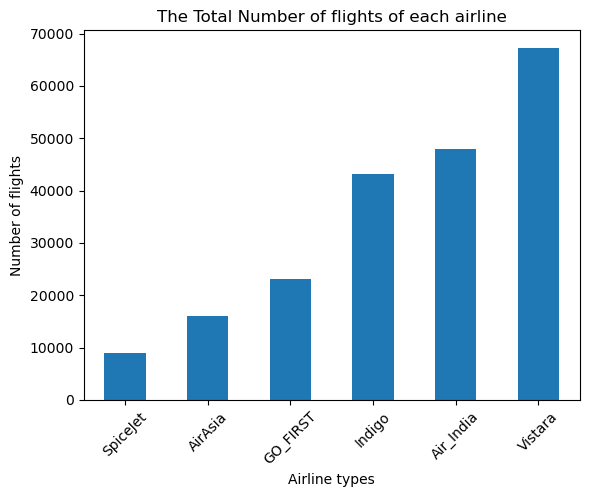

In [99]:
df_economy['airline'].value_counts(ascending=True).plot(kind='bar', rot=45)
plt.title("The Total Number of flights of each airline")
plt.xlabel("Airline types")
plt.ylabel("Number of flights")
plt.show()

### 2.3.6 - Check the Distribution of Flight Prices between Economy and All Classes

These 2 Histograms show the distribution of Flight Prices across All airline classes VS Economy Class Only. The left plot which includes both Business and Economy Class FLight Prices, shows a right-skewed distribution with one long bin extending toward 120,000 Rupees. This indicates the presence of Business Class Flight Prices which meant that it significantly extended the Overall Price Range. However, the right plot which only includes Economy Class Flight Prices, shows a similar right-skewed distribution but is more compact with most prices below 40,000 and fewer Extreme Outliers.

This insight shows the importance of filtering the dataset to only Economy Class before modelling. This is because including Businesss CLass data introduces substancial Variance and Outliers that can mislead predictions, especially since Business Class is underrepresented to only Vistara and AirIndia as shown in 3.4.1. By shifting the focus to only Economy Class, the models benefit from a More Stable and Consistent Price Range, improving accuracy and Generalization. This insight has ensured the model aligns with the business goal of reliable Flight Price prediction for the majority of Travellers who take Economy Class flights.

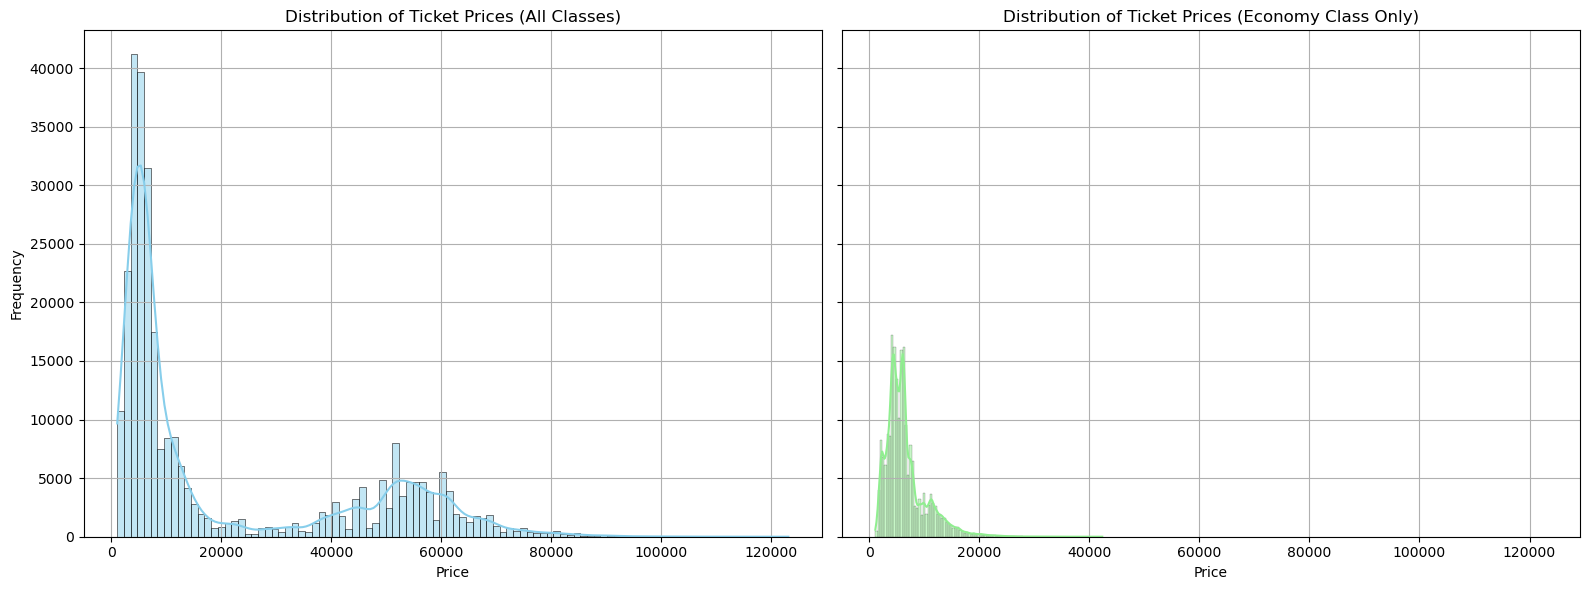

In [100]:
# Set up the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True)

# Histogram for full dataset with KDE (Kernel Density Estimate)
sns.histplot(df["price"], bins=100, kde=True, color="skyblue", ax=axes[0])
axes[0].set_title("Distribution of Ticket Prices (All Classes)")
axes[0].set_xlabel("Price")
axes[0].set_ylabel("Frequency")
axes[0].grid(True)

# Histogram for Economy Class only with KDE (Kernel Density Estimate)
sns.histplot(df_economy["price"], bins=100, kde=True, color="lightgreen", ax=axes[1])
axes[1].set_title("Distribution of Ticket Prices (Economy Class Only)")
axes[1].set_xlabel("Price")
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

# 3. Data Preparation

## 3.1 Data Cleaning

The reason why I filtered the Dataset to "Economy" class only is because earlier in 2.3.5 when I was comparing Airline "class" to "price" to see whether different classes affect the price, I found out that "Vistara" and "Air India" are the only airlines that offer Business Class. This meant that the "class" feature is not independent of "airline", risking overfitting to the few high-priced Business Class samples. By Filtering to "Economy" only, I reduce noise and variance by removing extreme outliers, improving model interpretability. This is to ensure a cleaner, more balanced dataset.

In [101]:
## Clean data
df = df[df["class"] == "Economy"]

Before One-Hot encoding, I decided to remove three features which is the "index", "flight" and "class". 

- "index" is simply a row identifier. It doesn’t carry any information about the flight itself, so including it would add noise without contributing predictive value. Models could mistakenly treat it as a numerical feature, which would distort training.

- "flight" is a unique flight ID. It uniquely identifies each record but doesn’t generalize across flights. If kept, the model might overfit by memorizing specific IDs rather than learning meaningful patterns.

In [102]:
# Define the target varibale for what I want my models to Predict
col_y = "price"
# Extract the target variable and stores it in y which will be used as the label during training.
y = df[col_y]
# Identifying columns that are not useful for prediction. "price" is already stored in y so no need to store inside X.
col_irrelevant = [col_y, "index", "flight", "class"]
# Removes the irrelevant columns from the Datasat, leaving only features behind.
X = df.drop(col_irrelevant, axis=1)
# Performs One-Hot encoding (COnvert categorical features to Numerical) so that Dataset is numerically compatible with models like Linear Regression.
X = pd.get_dummies(X, drop_first = True)
X

,duration,days_left,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,2.17,1,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
1,2.33,1,False,False,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
2,2.17,1,False,False,False,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,True
3,2.25,1,False,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,True
4,2.33,1,False,False,False,False,True,False,True,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206661,13.83,49,False,False,False,False,True,True,False,False,...,False,False,False,False,True,False,False,True,False,False
206662,13.83,49,False,False,False,False,True,True,False,False,...,False,False,False,False,True,False,False,True,False,False
206663,20.58,49,False,False,False,False,True,True,False,False,...,False,False,False,True,False,False,False,True,False,False
206664,23.33,49,False,False,False,False,True,True,False,False,...,False,False,False,True,False,False,False,True,False,False


## 3.2 Train-Test Split

This step below is required to resolve the imbalanced Dataset which I found about it in 3.4.5 where Vistare, Air India and Indigo Airlines dominante the number of flights. Train test split ensures that the models are trained on a representative sample of airlines and evaluated on unseen data, reducing the risk of overfitting to dominant airlines and improving greneralization across less frequent airlines like AirAsia and Spicejet.

In [103]:
## Split data into train set and test set
from sklearn.model_selection import train_test_split

test_size = 0.3
random_state = 2025
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)

# 4. Modelling

I have trained 4 different models: Linear Regression (The Baseline Model), Decision Tree Regressor, Gradient Boosting Regressor and Random Forest Regressor. The purpose of this is os that I do not rely on a single algorithm assumptions. Each model has different strengths. For example, Linear Regression is interpretable, Decision Trees capture non-linear splits, Gradient Boosting is good at minimizing bias, and Random Forest balances variance and robustness. By evaluating them side by side, I can identify which model best fits the dataset and business goal of airfare prediction. 

### 4.1 - Linear Regression (Baseline Model)

In [104]:
from sklearn.linear_model import LinearRegression

linr = LinearRegression(fit_intercept = True)
linr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### 4.2 - Decision Tree Regressor

In [105]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=2025)
dt.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,2025
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


### 4.3 - Gradient Boosting Regressor

In [106]:
from sklearn.ensemble import GradientBoostingRegressor

gbt = GradientBoostingRegressor(random_state=2025)
gbt.fit(X_train, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


### 4.4 - Random Forest Regressor

In [107]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=2025)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# 5. Model Evaluation

After training all 4 models, I can see that the Baseline Model, Linear Regression performed the worst with the highest MAE (1909) and RMSE (2639) and the lowest R square value (0.50). The other Models outperformed the Baseline Model but out of the 3 other Models, the Random Forest Regressor model achieved the Best Performance, with the lowest MAE (635) and RMSE (1388) and the highest R square value (0.86). Following that, Decision Tree Regressor had the Second-Best MAE (695), RMSE (1836) and R square value (0.75) while Gradient Boosting Regressor has the Third-Best MAE (1362), RMSE (2053) and R square value (0.69). Based on my insight, the reason why I got the results as they are is due to each Model's characteristics (explaned in 5.1 - 5.4). 

### 5.1 - Evaluating the Linear Regression (Baseline Model)

Linear Regression has the Worst Performance because it assumes a Linear Relationship between features and the target variable (price). Unfortunately, "price" is influenced by complex, non-linear factors like "stops" and "days_left", which Linear Regression is unable to capture. While this Model is simple and interpretable, it not good for modelling airline ticket prices as it has Poor Predictive Accuracy.

In [ ]:
from sklearn.metrics import r2_score
y_pred = linr.predict(X_test)

error = y_pred - y_test

absolute_error = np.abs(error)
mean_absolute_error = np.mean(absolute_error)
print("MAE: ", mean_absolute_error)

squared_error = error**2
mean_squared_error = np.mean(squared_error)

root_mean_squared_error = np.sqrt(mean_squared_error)
print("RMSE: ", root_mean_squared_error)

r2 = r2_score(y_test, y_pred)
print("R²:", r2)

MAE:  1909.4335508261602
MSE:  6966836.305467436
RMSE:  2639.476521105546
R²: 0.5032969156461828


### 5.2 - Evaluating the Decision Tree Regressor

Decision Tree has the Second-Best Performance because it is able to capture non-linear relationships and interactions between features more effectively than Linear Regression. A single tree partitions the feature space into regions that reflect pricing patterns, which explains why it has very Strong Performance. However, because it relies on one tree, the Decision Tree is more prone to Overfitting than Random Forest, which aggregates many trees.

In [ ]:
from sklearn.metrics import r2_score
y_pred_dt = dt.predict(X_test)

dt_error = y_pred_dt - y_test

dt_absolute_error = np.abs(dt_error)
dt_mean_absolute_error = np.mean(dt_absolute_error)
print("MAE: ", dt_mean_absolute_error)

dt_squared_error = dt_error**2
dt_mean_squared_error = np.mean(dt_squared_error)

dt_root_mean_squared_error = np.sqrt(dt_mean_squared_error)
print("RMSE: ", dt_root_mean_squared_error)

r2 = r2_score(y_test, y_pred_dt)
print("R²:", r2)

MAE:  695.8781317204301
MSE:  3373161.455503136
RMSE:  1836.6168504898174
R²: 0.7595092484580195


### 5.3 - Evaluating the Gradient Boosting Regressor

Gradient Boosting has the Third-Best Performance because it builds trees sequentially, where each tree corrects the errors of the previous ones. The Ensemble method is powerful but due to its default setting (No Hyper Parameter Tuning), it may have underperformed compared to Decision Trees and Random Forest. Additionally, Gradient Boosting is sensitive to "learning rate" and "number of estimators" and without careful tuning, it has a High Chance of Overfitting or Fail to capture the full complexity of Data.

In [ ]:
from sklearn.metrics import r2_score
y_pred_gbt = gbt.predict(X_test)

gbt_error = y_pred_gbt - y_test

gbt_absolute_error = np.abs(gbt_error)
gbt_mean_absolute_error = np.mean(gbt_absolute_error)
print("MAE: ", gbt_mean_absolute_error)

gbt_squared_error = gbt_error**2
gbt_mean_squared_error = np.mean(gbt_squared_error)

gbt_root_mean_squared_error = np.sqrt(gbt_mean_squared_error)
print("RMSE: ", gbt_root_mean_squared_error)

gbt_r2 = r2_score(y_test, y_pred_gbt)
print("R²:", gbt_r2)

MAE:  1362.252487049061
MSE:  4215907.872744965
RMSE:  2053.26760865333
R²: 0.6994253414421991


### 5.4 - Evaluating the Random Forest Regressor

Random Forest has the Best Performance because it is an essemble method that combines the predictions of many decision trees before averaging them. This reduces Variance and avoids Overfitting to noise in training data. Random Forest  is also effective in handling complex, non-linear relationships and categorical features such as "airline". This explains why this model achieved the Lowest MAE and RNSE, making it the most reliable model for predicting flight prices.

In [ ]:
from sklearn.metrics import r2_score
y_pred_rf = rf.predict(X_test)

rf_error = y_pred_rf - y_test

rf_absolute_error = np.abs(rf_error)
rf_mean_absolute_error = np.mean(rf_absolute_error)
print("MAE: ", rf_mean_absolute_error)

rf_squared_error = rf_error**2
rf_mean_squared_error = np.mean(rf_squared_error)

rf_root_mean_squared_error = np.sqrt(rf_mean_squared_error)
print("RMSE: ", rf_root_mean_squared_error)

rf_r2 = r2_score(y_test, y_pred_rf)
print("R²:", rf_r2)

MAE:  632.9050714798096
MSE:  1914056.664652166
RMSE:  1383.494367408905
R²: 0.8635366460075133


# 6. Iterative model development


I implemented both Feature Selection and Feature Engineering to evaluate which approach would provide the most benefit for my flight price prediction model. The purpose of Feature selection, using Random Forest importance scores, is to identify and remove low-contributing variables in order to simplify the model and reduce noise. This approach tested whether trimming irrelevant features could improve efficiency and generalization. On the other hand, the purpose of feature engineering with K-Means clustering, is to create a new “cluster” feature that captured hidden groupings of flights based on shared attributes. This enriched the dataset by adding higher-level structure that the model could leverage to detect pricing patterns across flight groups.

### 6.1.1 - Finding how important each feature are

I created a Feature Importance Graph and a Cumulative Importance line to know which features after the Random Forest Regressor are the most imnfluential. From the results below, I can see that "days_left" (imprtance = 0.5) and "duration" (importance = 0.2) are the most influential features, accounting over 70% of the model's predictive power. These results also confirm my EDA insights, which is that Days Before Departure and FLight Length are the strongest drivers. Airline-specific features such as "Air India" and "Vistara" also carry moderate importance, reflecting brand-level pricing strategies, while categorical variables like "source_city", "destination_city", "arrival_time" and "departure_city" which has been preprocessed through One-hot encoding, had contributed to minimal importance.

In [112]:
df_rf_feat_impt = pd.DataFrame({
    "Feature": rf.feature_names_in_,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

df_rf_feat_impt["Cumulative Importance"] = df_rf_feat_impt["Importance"].cumsum()

df_rf_feat_impt

,Feature,Importance,Cumulative Importance
1,days_left,0.503788,0.503788
0,duration,0.204018,0.707806
2,airline_Air_India,0.040939,0.748745
6,airline_Vistara,0.038627,0.787372
17,stops_two_or_more,0.022358,0.809731
10,source_city_Kolkata,0.015851,0.825581
27,destination_city_Kolkata,0.013096,0.838677
7,source_city_Chennai,0.012209,0.850886
8,source_city_Delhi,0.011276,0.862162
11,source_city_Mumbai,0.011201,0.873363


C:\Users\justi\AppData\Local\Temp\ipykernel_22808\1819976591.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


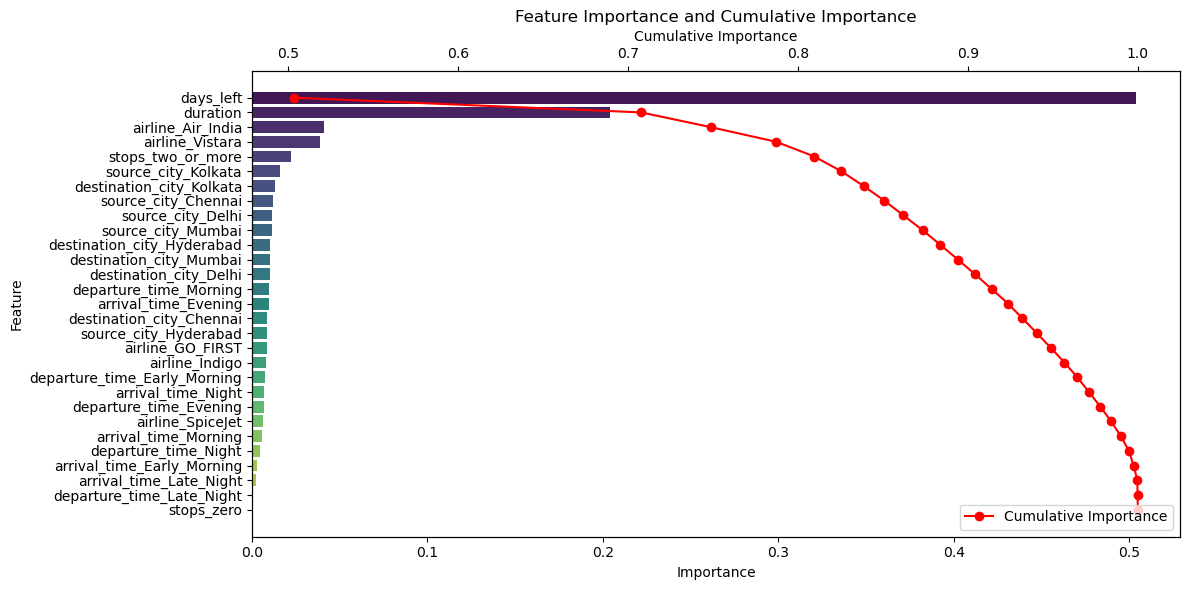

In [113]:
# Sort features by importance (already done in your df_rf_feat_impt)
plt.figure(figsize=(12,6))

# Barplot of feature importance
sns.barplot(
    x="Importance", 
    y="Feature", 
    data=df_rf_feat_impt,
    palette="viridis"
)

# Add cumulative importance line on secondary x-axis
ax1 = plt.gca()
ax2 = ax1.twiny()  # create secondary x-axis

ax2.plot(
    df_rf_feat_impt["Cumulative Importance"], 
    df_rf_feat_impt["Feature"], 
    color="red", 
    marker="o", 
    linestyle="-", 
    label="Cumulative Importance"
)

# Titles and labels
ax1.set_title("Feature Importance and Cumulative Importance")
ax1.set_xlabel("Importance")
ax1.set_ylabel("Feature")
ax2.set_xlabel("Cumulative Importance")

# Add legend for cumulative line
ax2.legend(loc="lower right")

plt.tight_layout()
plt.show()

### 6.1.2 - Feature Selection

After visualizing the feature importances of each feature, I decided to remove features that have importance scores below 0.001 using a threshold. The rationale was to simplify the model by excluding features that added little predictive power and my expectation is that this would reduce complexity and potentially improve performance of the model. There were only two features that was removed which was: 'departure_time_Late_Night' and 'stops_zero'.

However, after training the model with the Reduced Number of Features, the Model showed a Slightly Higher MAE (633.01) and RMSE (1383.93) and a Slightly Lower R Square (0.8634) compared to when the Model had Full Features (MAE = 632.90, RMSE = 1383.49, R square = 0.8635). 

These results show me that even low-importance features can contribute to subtle variance when combined in an ensemble model (Random Forest Regressor). Therefore, I decided not to do Feature Selection for final modelling to preserve accuracy.

In [ ]:
# Step 1: Select features above a threshold
threshold = 0.001
selected_features = df_rf_feat_impt[df_rf_feat_impt["Importance"] >= threshold]["Feature"]
unselected_features = df_rf_feat_impt[df_rf_feat_impt["Importance"] <= threshold]["Feature"]

print("Selected Features:", selected_features.tolist())
print("Unselected Features:", unselected_features.tolist())

# Step 2: Reduce train and test sets
X_train_reduced = X_train[selected_features]
X_test_reduced = X_test[selected_features]

# Step 3: Train new Random Forest on reduced features
rf_reduced = RandomForestRegressor(random_state=2025)
rf_reduced.fit(X_train_reduced, y_train)

# Step 4: Evaluate
y_pred_rf_reduced = rf_reduced.predict(X_test_reduced)

error = y_pred_rf_reduced - y_test
mae = np.mean(np.abs(error))
mse = np.mean(error**2)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf_reduced)

print("Reduced RF MAE:", mae)
print("Reduced RF RMSE:", rmse)
print("Reduced RF R²:", r2)

Selected Features: ['days_left', 'duration', 'airline_Air_India', 'airline_Vistara', 'stops_two_or_more', 'source_city_Kolkata', 'destination_city_Kolkata', 'source_city_Chennai', 'source_city_Delhi', 'source_city_Mumbai', 'destination_city_Hyderabad', 'destination_city_Mumbai', 'destination_city_Delhi', 'departure_time_Morning', 'arrival_time_Evening', 'destination_city_Chennai', 'source_city_Hyderabad', 'airline_GO_FIRST', 'airline_Indigo', 'departure_time_Early_Morning', 'arrival_time_Night', 'departure_time_Evening', 'airline_SpiceJet', 'arrival_time_Morning', 'departure_time_Night', 'arrival_time_Early_Morning', 'arrival_time_Late_Night']
Unselected Features: ['departure_time_Late_Night', 'stops_zero']
Reduced RF MAE: 633.0117352656811
Reduced RF RMSE: 1383.9232622979782
Reduced RF R²: 0.8634520233178866


### 6.2.1 - Feature Engineering Part 1

I applied feature engineering using K-Means clustering to uncover hidden structure in the flight data. K-Means is an Unsupervised Learning method which can also be used in Supervised Learning to group similar flights into clusters based on their attributes.

I used StandardScaler to Scale the features before Clustering so that no single feature dominates clustering because of their numerical range, making K-means clustering give each feature equal importance in distance calculations. I then moved on towards One-Hot encoding before I applied the Elbow Method, plotting the Within-Cluster Sum of Squares (WCSS) against the number of clusters and identified the elbow point, k=7, where the rate of improvement begins to flatten. This meant that 7 clusters provided the optimal balance between model complexity and explanatory power. Finally, I trained the K-Means model with the Scaled Features. 

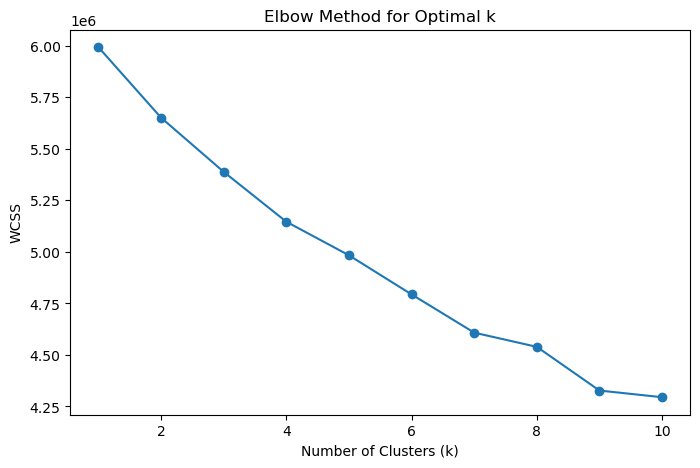

In [115]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

col_y = "price"
y = df[col_y]
col_irrelevant = [col_y, "index", "flight"]

X = df.drop(col_irrelevant, axis=1)
X = pd.get_dummies(X, drop_first=True)

# Scale features for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Calculate WCSS for different k values
wcss = []
K_range = range(1, 11)  # test k from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=2025)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ = WCSS

# Step 3: Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.show()

### 6.2.2 - Feature Engineering Part 2

These cluster labels were then added as a new feature to the Dataset. I retrained the Random Forest Regressor Model using the new feature set and compared the results with the original model. The MAE improved slightly from 632.90 to 631.99 and the RMSE improved from 1383.49 to 1381.96, showing me that the cluster feature slightly helped the model better capture the Flight ticket pricing patterns across the different flight groups.

In conclusion, using K-Means Clustering for feature engineering provided a more accurate way to capture relationships in the Dataset than doing Feature Selection. Hence, I will be using Feature Engineering for my Final Model.

In [116]:
# Fit K-Means
kmeans = KMeans(n_clusters=7, random_state=2025)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels as a new feature
df["cluster"] = cluster_labels

C:\Users\justi\AppData\Local\Temp\ipykernel_22808\586540912.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cluster"] = cluster_labels


In [117]:
col_y = "price"
y = df[col_y]
col_irrelevant = [col_y, "index", "flight"]

# One-Hot encoding
X = df.drop(col_irrelevant, axis=1)
X = pd.get_dummies(X, drop_first=True)

# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2025)

rf = RandomForestRegressor(random_state=2025)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

error = y_pred_rf - y_test
mae = np.mean(np.abs(error))
rmse = np.sqrt(np.mean(error**2))

r2 = r2_score(y_test, y_pred_rf)
print("R²:", r2)

print("RF with K-Means cluster feature - MAE:", mae)
print("RF with K-Means cluster feature - RMSE:", rmse)
print("RF with K-Means cluster feature - R²:", r2)

R²: 0.8638380363772946
RF with K-Means cluster feature - MAE: 631.9955092252653
RF with K-Means cluster feature - RMSE: 1381.9657432383474
RF with K-Means cluster feature - R²: 0.8638380363772946


# 7. Hyper Parameter Tuning


I set up a Dictionary of Parameter values (param_dist_rf) to test every single combination of parameters. In the Dictionary, there are a total of 5 Hyperparameters.

- n_estimators: Number of tress in the Forest. More Trees reduces Variance but increases computational runtime.
  - RandomiszedSearchCV increased the default n_estimators 100 to 704, which impacted my RMSE by reducing it slightly and helped stabilize predictions.

- criterion: Function to measure split quality.
  - I kept the criterion as squared_error, which is a standard choice for Regression. This ensured that the splits minimized variance.

- max_depth: Maximum depth of each tree which controls the Model's complexity. 
  - RandomizedSearchCV chose max-Depth of 29 to allow capturing of complex patterns during Cross Validation (Lowering RMSE). However, it has a higher chance of Overfitting (Increasing MAE) but Random Forest Regressor mitigates this with averaging.

- max_feature: Number of features considered at each split.
  - RandomizedSearchCV used sqrt (Square root the total number of features to be considered at each split) to balance diversity across trees. This helps prevents Overfitting by limiting the feature usage per split.

- max_samples: Fraction of samples used to train each tree, adding randomess and improving generalization.
  - RandomizedSearchCV chose max_smaples below 1.0, which helped reduce variance and improve the R square slightly.


In [118]:
from scipy.stats import randint, uniform

param_dist_rf = {
    'n_estimators': randint(500, 900),
    'criterion': ['squared_error'],
    'max_depth': randint(15,45),
    'max_features': ['sqrt', 'log2'],
    'max_samples': uniform(0.8, 0.2)
}

RandomizedSearchCV is a Cross Validation method that tries some of the combination of Hyperparamters within a range I specified in the Dictionary of Paremeter values above. Inside the Corss Validation model, I need to specify some variables in it:

- estimator = rf: Specifies the model that I am tuning which is the RandomForestRegressor(rf)

- param_distributions = param_dist_rf: Uses the dictionary of hyperparameters I had defined using the Dictionary of Parameter values I specified above. (n_estimators, criterion, max_depth, max_features, max_smaples) as the search space.

- cv = 5: This applies 5-fold cross-validation. This means that the training data is split into 5 subsets. The model is trained and validated across these folds to ensure robustness and reduce overfitting.

- scoring = "neg_mean_squared_error": This specifies the evaluation metric used during cross validation. The Negative of MSE is used meaning that minimizing MSE corresponds to maximizing the negative MSE score. Choosing this metric will cause the search to prioritize models that reduce large deviations in ticket price predictions, leading to more stable and accurate results.

- n_iter = 3: Runs 3 random combinations of hyperparamters. This limits compuatational time while testing diverse parameter sets. Since I am only allowed to not have more than 3 iterations of the combinations, I chose 3 because I want to use the most number of combination as I can so that I can improve model performance by conducting a more thorough search of the hyperparameter space.

- n_jobs = -1: This allows RandomSearchCV to use all available CPU cores to parllelize training, speeding up the search process.

- random_stae = 2025: Ensures reproducibility by fixing the random seed. I will use "2025" since I have been using it as my seed during the entire project.

Finally, I will excute the Randomized Search using "rs_rf.fit(X_train, y_train)", training multiple Random Forest models with different Hyperparameter combination, and then select the best--performing model based on Cross-Validation MAE.


In [119]:
from sklearn.model_selection import RandomizedSearchCV

rs_rf = RandomizedSearchCV(
    estimator = rf,
    param_distributions = param_dist_rf,
    cv = 5,
    scoring = 'neg_mean_squared_error',
    n_iter = 3,
    n_jobs = -1,
    random_state=2025
)

rs_rf.fit(X_train, y_train)

best_rs_params = rs_rf.best_params_  
best_rs_rf = rs_rf.best_estimator_ 
print("Best Parameters: ", best_rs_params)
print("Best Estimator: ", best_rs_rf)

Best Parameters:  {'criterion': 'squared_error', 'max_depth': 33, 'max_features': 'sqrt', 'max_samples': np.float64(0.9865211279773005), 'n_estimators': 823}
Best Estimator:  RandomForestRegressor(max_depth=33, max_features='sqrt',
                      max_samples=np.float64(0.9865211279773005),
                      n_estimators=823, random_state=2025)


I compared the Original Random Forest Regressor Model (Before Tuning and Feature Engineering) with the Final Random Forest Regressor Model (After Tuning and Feature Engineering). The Final Model used 704 trees, a maximum depth of 29, sqrt feature sampling and 98.6% of samples per tree.

Based on the Table below, showing the comparison of Regression metrics (MAE, MSE, RMSE and R square) between the Original (ORF) and Final (FRF) Random Forest Regressor Model, I see that:
- FRF MAE is slightly worse than ORF (632.90 -> 651.69)
- FRF RMSE improved marginally (1383 -> 1372)
- FRF R square increased slightly (0.8635 -> 0.8657)

The table shows that the Hyperparameter tuning made small improvements in reducing large errors but did not significantly change the Overall Accuracy. As for the slightly worse MAE, some possibilities are:
- As stated from the project specifications (use only RandomizedSearchCV, with no more than 3 values for each
hyperparameter), I was only allowed 3 interations and RandomisedSearchCV might not have landed on the best MAE configuration.
- Since I tuned the model using "neg_mean_squared_error" as the scoring metric, the search prioritized reducing larger errors (RMSE) rather than minimizing absolute errors (MAE). This results in the model improving RMSE but allowed small to medium errors, which raised the MAE slightly.
- Since adding the engineered cluster feature in 6.2.2, it may have changed how the model weights certain predictors. While this helped reduce large deviations (RMSE), it may have introduced slight inconsistencies in predicting smaller deviations, increasing MAE slightly.

Eventhough, improvements were very small, the Hyperparameter tuning process demostrated how tuning can refine model behaviour and bias-variance trade-offs.

In [120]:
from sklearn.metrics import r2_score

y_pred_rs_rf = best_rs_rf.predict(X_test)

rs_rf_error = y_pred_rs_rf - y_test

# Mean Absolute Error of RandomForestRegressor after Hyperparamter tuning
rs_rf_absolute_error = np.abs(rs_rf_error)
rs_rf_mean_absolute_error = np.mean(rs_rf_absolute_error)

# Root Mean Squared Error of RandomForestRegressor after Hyperparamter tuning
rs_rf_squared_error = rs_rf_error**2
rs_rf_mean_squared_error = np.mean(rs_rf_squared_error)

rs_rf_root_mean_squared_error = np.sqrt(rs_rf_mean_squared_error)

# R square value of RandomForestRegressor after Hyperparamter tuning
rs_rf_r2 = r2_score(y_test, y_pred_rs_rf)


# Metrics from your runs
original_results = {
    "Model": "Original RF",
    "MAE": rf_mean_absolute_error,
    "RMSE": rf_root_mean_squared_error,
    "R²": rf_r2
}

final_results = {
    "Model": "Final RF (Tuned)",
    "MAE": rs_rf_mean_absolute_error,
    "RMSE": rs_rf_root_mean_squared_error,
    "R²": rs_rf_r2
}

# Create DataFrame
comparison_df = pd.DataFrame([original_results, final_results])

# Display table
print(comparison_df)

              Model         MAE         RMSE        R²
0       Original RF  632.905071  1383.494367  0.863537
1  Final RF (Tuned)  651.695958  1372.000420  0.865795


# 8. Evaluation Metric Selection, Interpretation and Justification

Throughout this project of applying Supervised Machine Learning to complete this Regression task of predicting airline ticket prices, I considered several Evaluation metrics, which includes:

- Mean Absolute Error (MAE)
- Mean Root Squared Error (RMSE)
- R square value (R²)

Each metric serves a different view on the Model Performance. MAE measure the average absolute deviation between predicted and actual flight prices, which makes it easy to interpret but treats all errors equally. RMSE penalizes larger errors more significantly than MAE since errors are squared before averaging and it is easy to interpret because it is square-rooted after that. Finally, R square indicates how much of the variance in FLight Prices is explained by the model, which provides insight into Overall Explanatory Power.

However, RMSE and R square were selected as the most appropriate primary evaluation metric. The business outcome of my Machine Learning Solution is so that Customers can rely on accurate price predictions to support travel planning, dynamic pricing and data-driven decision making. 

- Why RMSE?: Large errors in prediction can mislead customers and result in poor business strategies. RMSE directly addresses this risk by penalizing extreme deviations more strongly, ensuring that the model prioritizes minimizing costly mistakes.

- Why R square?: Used to compliment RMSE, by measuring how much of the variance in flight prices is explained by the model. This provides insight as to whether the model is capturing the factors or features (such as airline, route, duration and days left before departure) that influence flight prices rather than just producing close predictions by chance.

Using both of these metrics offers a more balanced evaluation. RMSE ensures prediction accuracy while R square ensures explanatory power, making the model both reliable for customers and valuable to business applications.